In [ ]:
### Missingness Generation, Imputation Using Denoising Autoencoder and Classification using Random Forest Classifier
### Dataset with 40% missingness generated in the MOTHDEM column

In [ ]:
# Creating a copy of the dataset to make 40% missingness in the 'MOTHDEM' column
df_40MM = df_actual.copy()
df_40MM.head()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0,0.0,0


In [ ]:
!pip install tensorflow

In [ ]:
# 40% missingness introduction in the 'MOTHDEM' column
import pandas as pd
import numpy as np

# Set random seed for reproducibility
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'MOTHDEM' based on 'CDR'
def introduce_missingness(df_40MM):
    # Define the probability of missingness
    p_missing = 0.4

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_40MM['CDR'] == 0.5) | (df_40MM['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'MOTHDEM'
    missing_indices = df_40MM[mask].sample(frac=p_missing).index
    df_40MM.loc[missing_indices, 'MOTHDEM'] = np.nan

    return df_40MM

  # Call the function to introduce missingness
df_40MM_missingness = introduce_missingness(df_40MM)

In [ ]:
# Observing the missingness generated
df_40MM_missingness.head()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0.0,0.0,0


In [ ]:
df_40MM_missingness.tail()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
554,0.102050,0.000000,0.000000,0.379090,0.115710,0.014856,0.152403,0.095275,0.018378,0.311250,...,0.2,0.000000,1.00,1.0,1.000000,1.0,0.0,1.0,1.0,2
555,0.693037,0.668451,0.356448,0.566407,0.445647,0.057959,0.304343,0.132452,0.246746,0.142295,...,1.0,0.416667,1.00,1.0,1.000000,1.0,0.6,0.0,0.5,0
556,0.600632,0.715813,0.277625,0.483890,0.390352,0.058854,0.482336,0.362199,0.698153,0.252722,...,0.8,0.666667,1.00,1.0,1.000000,1.0,0.6,0.0,0.5,0
557,0.842654,0.786929,0.188005,0.571366,0.315403,0.042039,0.251464,0.139725,0.234703,0.082283,...,1.0,0.416667,0.75,0.5,0.666667,0.5,0.6,NaN,0.5,1
558,0.548794,0.615394,0.138131,0.454855,0.208531,0.034581,0.024287,0.199837,0.290168,0.081695,...,1.0,0.666667,1.00,1.0,1.000000,1.0,0.8,1.0,0.0,0


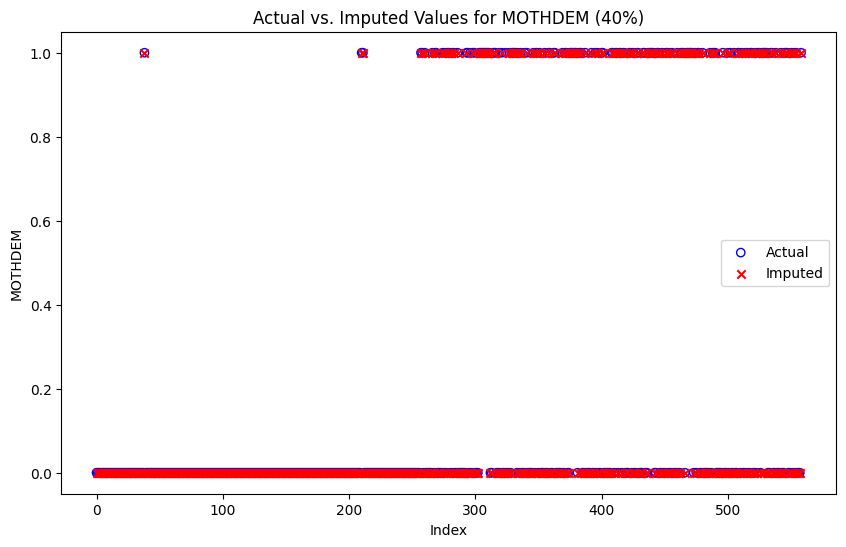

In [ ]:
# Visualising the actual values and imputed values of the 'MOTHDEM' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM']
imputed_values = df_imputed['MOTHDEM']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('MOTHDEM')
plt.title('Actual vs. Imputed Values for MOTHDEM (40%)')
plt.legend()
plt.show()



In [ ]:
## It has shown that the imputed values closely follow the trend of the actual values.
## It indicates that the imputation process was successful in capturing the underlying patterns in the data.

In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract actual and imputed values
actual_values = df_actual['MOTHDEM'] # contains the actual values of 'MOTHDEM'
imputed_values = df_imputed['MOTHDEM'] # contains the imputed values of 'MOTHDEM


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.13375009404306792


In [ ]:
# The RMSE value of approximately 0.134 indicates the average difference between the actual values of 'MOTHDEM' and the imputed values produced by the denoising autoencoder.
# Lower RMSE values indicate better performance
# Suggesting that the imputed values closely match the actual values.
# Here, the value indicates that the model effectively captured the underlying patterns in the data to generate plausible imputed values for the missing entries.

In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values by compares the imputes values with  the actual values and counts how many values are correctly imputed
correct_imputations = (df_actual['MOTHDEM'] == df_imputed['MOTHDEM']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed['MOTHDEM'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)

Imputation Accuracy: 0.9821109123434705


In [ ]:
# Extracting most important features from the hidden layer
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())


        Feature  Importance
176    PTGENDER   14.103308
219        APOE   13.275508
217     MOTHDEM   11.368931
218         CDR   10.851101
28   CC_Central    9.785942


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using 10 Fold Cross Validation

# Importing all the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Split the dataset into features (X) and target variable (y)
X = df_imputed.drop(columns=['AD_LABEL'])  # Features
y = df_imputed['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.92045455 0.92045455 0.89772727 0.94318182 0.97727273 0.97727273
 1.         0.93103448 0.95402299 0.96551724]
Mean CV Score: 0.9486938349007314
Std CV Score: 0.030186083022352574
Accuracy: 0.8035714285714286
Precision: 0.8010912698412699
Recall: 0.8035714285714286
F1-score: 0.8014387573211103

Confusion Matrix:
[[65  5  1]
 [ 7 15  5]
 [ 0  4 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.92      0.91        71
           2       0.62      0.56      0.59        27
           3       0.62      0.71      0.67        14

    accuracy                           0.80       112
   macro avg       0.72      0.73      0.72       112
weighted avg       0.80      0.80      0.80       112



In [ ]:
# The classification model achieved an accuracy of 80.36% in predicting the target variable 'AD_LABEL' after imputing 40% missing values in the 'MOTHDEM' column using denoising autoencoder.
# For class 3, which represents AD, the precision, recall, and F1-score are 0.62, 0.71, and 0.67, respectively.
# Precision (0.62): This indicates that among the instances predicted as AD, 62% were correctly classified, while the remaining 38% were incorrectly classified as AD.
# Recall (0.71): This suggests that out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.67): The harmonic mean of precision and recall, which provides a balanced measure of the classifier's performance, is 67%.

In [ ]:
# 50% missingness in 'MOTHDEM' column and it's imputation using denoising autoencoder
# 50% MISSINGNESS

In [ ]:
# Creating a copy of original dataframe to add 50% missingness in the 'MOTHDEM' column
df_50MM = df_actual.copy()

In [ ]:
# 50% missingness introduction in the 'MOTHDEM' column
import pandas as pd
import numpy as np

# Set random seed for reproducibility
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'MOTHDEM' based on 'CDR'
def introduce_missingness(df_50MM):
    # Define the probability of missingness
    p_missing = 0.5

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_50MM['CDR'] == 0.5) | (df_50MM['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'MOTHDEM'
    missing_indices = df_50MM[mask].sample(frac=p_missing).index
    df_50MM.loc[missing_indices, 'MOTHDEM'] = np.nan

    return df_50MM

  # Call the function to introduce missingness
df_50MM_missingness = introduce_missingness(df_50MM)



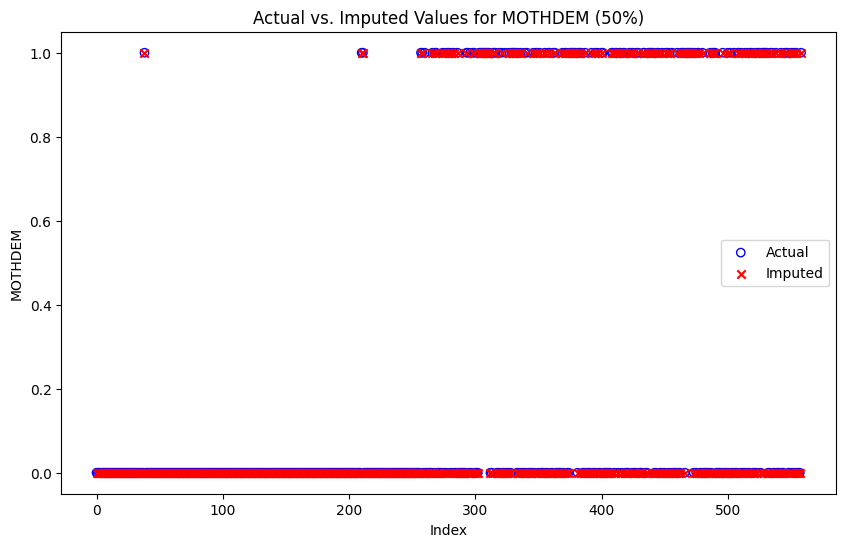

In [ ]:
# Visualising the actual values and imputed values of the 'MOTHDEM' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM']
imputed_values = df_imputed_50M['MOTHDEM']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('MOTHDEM')
plt.title('Actual vs. Imputed Values for MOTHDEM (50%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()


In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM'] # contains the actual values of 'MOTHDEM'
imputed_values = df_imputed_50M['MOTHDEM'] # contains the imputed values of 'MOTHDEM

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.16918197377512542


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['MOTHDEM'] == df_imputed_50M['MOTHDEM']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_50M['MOTHDEM'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)


Imputation Accuracy: 0.9713774597495528


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed_50M.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())



                  Feature  Importance
219                  APOE   13.223660
217               MOTHDEM   13.074874
176              PTGENDER   12.674565
29        CC_Mid_Anterior    9.958637
141  wm.rh.corpuscallosum    9.630075


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target variable (y)
X = df_imputed_50M.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_50M['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.92045455 0.93181818 0.90909091 0.94318182 0.97727273 0.97727273
 1.         0.95402299 0.96551724 0.96551724]
Mean CV Score: 0.9544148380355276
Std CV Score: 0.026858896240461772
Accuracy: 0.7857142857142857
Precision: 0.7749299719887955
Recall: 0.7857142857142857
F1-score: 0.7762669285331493

Confusion Matrix:
[[65  5  1]
 [10 12  5]
 [ 0  3 11]]

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.92      0.89        71
           2       0.60      0.44      0.51        27
           3       0.65      0.79      0.71        14

    accuracy                           0.79       112
   macro avg       0.70      0.72      0.70       112
weighted avg       0.77      0.79      0.78       112



In [ ]:
# The accuracy obtained for the dataset of 50% missingness is 0.786, indicating that 78.6% of the test instances were correctly classified.
# Precision (0.65): Among the instances predicted as AD, 65% were correctly classified as AD, while the remaining 35% were incorrectly classified as non-AD.
# Recall (0.79): Out of all actual instances of AD, the model correctly identified 79% of them as AD, while the remaining 21% were incorrectly classified as non-AD.
# F1-score (0.71): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 71%.

In [ ]:
### 60% missingness creation in 'MOTHDEM' column, imputation, extraction of important features.
### 60% MISSINGNESS

In [ ]:
# Creating a copy of original dataframe to add 60% missingness in the 'MOTHDEM' column
df_60MM = df_actual.copy()

In [ ]:
# Creating 60% missingness in the 'MOTHDEM' column
# Set random seed for reproducibility
import numpy as np
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'MOTHDEM' based on 'CDR'
def introduce_missingness(df_60MM):
    # Define the probability of missingness
    p_missing = 0.6

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_60MM['CDR'] == 0.5) | (df_60MM['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'MOTHDEM'
    missing_indices = df_60MM[mask].sample(frac=p_missing).index
    df_60MM.loc[missing_indices, 'MOTHDEM'] = np.nan

    return df_60MM

  # Call the function to introduce missingness
df_60MM_missingness = introduce_missingness(df_60MM)

In [ ]:
# Imputation of 60% missingness in the 'MOTHDEM' column using a denoising autoencoder

import tensorflow as tf
import numpy as np

# Replace missing values with a placeholder value (-1)
features_filled = df_60MM_missingness.fillna(-1)

# Define the architecture of the denoising autoencoder with dropout
input_dim = len(features_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden layer

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

#  Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(features_filled, features_filled, epochs=50, batch_size=50, validation_split=0.2)

# Using the trained autoencoder to predict and impute missing binary values
imputed_data = autoencoder.predict(features_filled)

# Apply threshold to convert continuous predictions to binary values (0 or 1)
threshold = 0.5
imputed_data_binary = np.where(imputed_data < threshold, 0, 1)

# Replace missing values in the original dataset with the predicted binary values
df_imputed_60M = df_60MM_missingness.copy()  # Create a copy of the original features dataframe
df_imputed_60M['MOTHDEM'] = np.where(df_60MM_missingness['MOTHDEM'].isnull(), imputed_data_binary[:, df_60MM_missingness.columns.get_loc('MOTHDEM')], df_60MM_missingness['MOTHDEM'])





Epoch 1/50
9/9 [==============================] - 1s 43ms/step - loss: 0.1238 - val_loss: 0.1111
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0888 - val_loss: 0.0623
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0507 - val_loss: 0.0369
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0356 - val_loss: 0.0298
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0296 - val_loss: 0.0268
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0271 - val_loss: 0.0248
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0252 - val_loss: 0.0227
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0235 - val_loss: 0.0217
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0227 - val_loss: 0.0211
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0219 - val_loss: 0.0209
Epoch 11/50
9/9 [============

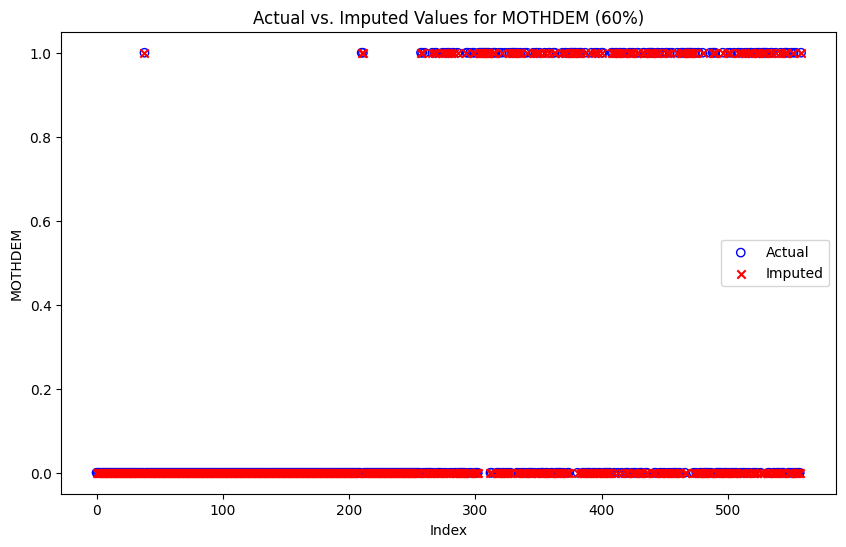

In [ ]:
# Visualising the actual values and imputed values of the 'MOTHDEM' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM']
imputed_values = df_imputed_60M['MOTHDEM']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('MOTHDEM')
plt.title('Actual vs. Imputed Values for MOTHDEM (60%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()



In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM'] # contains the actual values of 'MOTHDEM'
imputed_values = df_imputed_60M['MOTHDEM'] # contains the imputed values of 'MOTHDEM

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.1983834490182206


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['MOTHDEM'] == df_imputed_60M['MOTHDEM']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_60M['MOTHDEM'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)



Imputation Accuracy: 0.960644007155635


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed_60M.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())


      Feature  Importance
176  PTGENDER   14.057050
219      APOE   13.785817
217   MOTHDEM   10.824804
175       AGE    9.962550
218       CDR    9.826558


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Split the dataset into features (X) and target variable (y)
X = df_imputed_60M.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_60M['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.94505495 0.94505495 0.91208791 0.95604396 0.95604396 0.96703297
 0.96703297 0.97802198 0.95604396 0.95555556]
Mean CV Score: 0.9537973137973138
Std CV Score: 0.016875915446551624
Accuracy: 0.7767857142857143
Precision: 0.7868697478991596
Recall: 0.7767857142857143
F1-score: 0.7795198222829801

Confusion Matrix:
[[51  8  1]
 [ 9 21  1]
 [ 0  6 15]]

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        60
           2       0.60      0.68      0.64        31
           3       0.88      0.71      0.79        21

    accuracy                           0.78       112
   macro avg       0.78      0.75      0.76       112
weighted avg       0.79      0.78      0.78       112



In [ ]:
# The accuracy of the Random Forest Classifier model is 0.777, indicating that approximately 77.7% of the test instances were correctly classified.
# For class 3, representing AD:
# Precision (0.88): Among the instances predicted as AD, 88% were correctly classified as AD, while the remaining 12% were incorrectly classified as non-AD.
# Recall (0.71): Out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.79): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 79%.
# The model has a high precision rate for AD (88%), indicating a low rate of false positives, but a moderate recall rate (71%)

In [ ]:
### 70% missingness creation in the 'MOTHDEM' column, imputation, feature extraction, classification, evaluation
### 70% MISSINGNESS
### Imputation by denoising autoencoder

In [ ]:
# Creating a copy of original dataframe to add 70% missingness in the 'MOTHDEM' column
df_70MM = df_actual.copy()

In [ ]:
# Creating 70% missingness in the data
# Set random seed for reproducibility
import numpy as np
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'MOTHDEM' based on 'CDR'
def introduce_missingness(df_70MM):
    # Define the probability of missingness
    p_missing = 0.7

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_70MM['CDR'] == 0.5) | (df_70MM['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'MOTHDEM'
    missing_indices = df_70MM[mask].sample(frac=p_missing).index
    df_70MM.loc[missing_indices, 'MOTHDEM'] = np.nan

    return df_70MM

  # Call the function to introduce missingness
df_70MM_missingness = introduce_missingness(df_70MM)

In [ ]:
# Imputation of 70% missingness in the 'MOTHDEM' column using a denoising autoencoder

import tensorflow as tf
import numpy as np

# Replace missing values with a placeholder value (-1)
features_filled = df_70MM_missingness.fillna(-1)

# Define the architecture of the denoising autoencoder with dropout
input_dim = len(features_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden layer

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

#  Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(features_filled, features_filled, epochs=50, batch_size=50, validation_split=0.2)

# Using the trained autoencoder to predict and impute missing binary values
imputed_data = autoencoder.predict(features_filled)

# Apply threshold to convert continuous predictions to binary values (0 or 1)
threshold = 0.5
imputed_data_binary = np.where(imputed_data < threshold, 0, 1)

# Replace missing values in the original dataset with the predicted binary values
df_imputed_70M = df_70MM_missingness.copy()  # Create a copy of the original features dataframe
df_imputed_70M['MOTHDEM'] = np.where(df_70MM_missingness['MOTHDEM'].isnull(), imputed_data_binary[:, df_70MM_missingness.columns.get_loc('MOTHDEM')], df_70MM_missingness['MOTHDEM'])



Epoch 1/50
9/9 [==============================] - 2s 47ms/step - loss: 0.1244 - val_loss: 0.1117
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0904 - val_loss: 0.0678
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0553 - val_loss: 0.0408
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0382 - val_loss: 0.0320
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0315 - val_loss: 0.0287
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0287 - val_loss: 0.0272
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0270 - val_loss: 0.0256
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0250 - val_loss: 0.0237
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0237 - val_loss: 0.0224
Epoch 10/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0217
Epoch 11/50
9/9 [==============

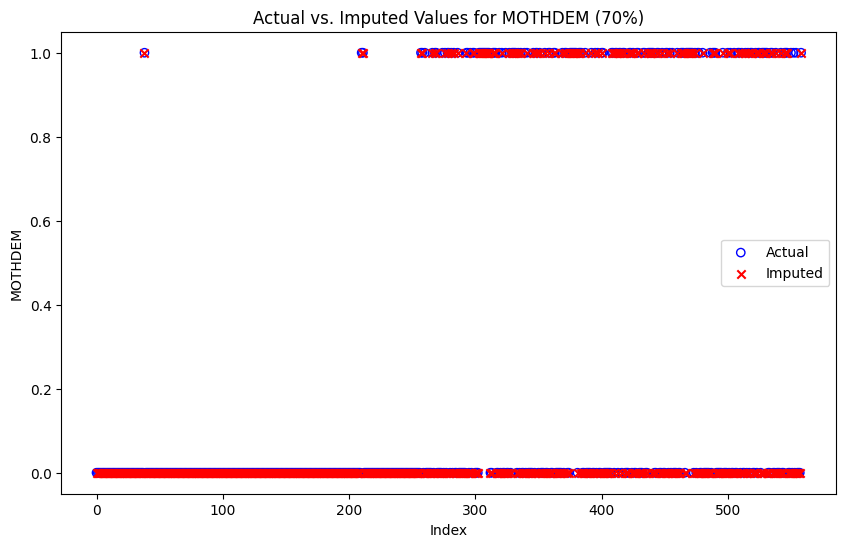

In [ ]:
# Visualising the actual values and imputed values of the 'MOTHDEM' column of 70% missingness

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM']
imputed_values = df_imputed_70M['MOTHDEM']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('MOTHDEM')
plt.title('Actual vs. Imputed Values for MOTHDEM (70%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()

In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['MOTHDEM'] # contains the actual values of 'MOTHDEM'
imputed_values = df_imputed_70M['MOTHDEM'] # contains the imputed values of 'MOTHDEM

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.21566554640687682


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['MOTHDEM'] == df_imputed_70M['MOTHDEM']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_70M['MOTHDEM'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)


Imputation Accuracy: 0.9534883720930233


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed_70M.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())



              Feature  Importance
176          PTGENDER   13.471576
219              APOE   13.374731
217           MOTHDEM   10.966492
218               CDR   10.431189
27   CC_Mid_Posterior   10.178187


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target variable (y)
X = df_imputed_70M.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_70M['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.95604396 0.94505495 0.92307692 0.95604396 0.96703297 0.97802198
 0.96703297 0.98901099 0.95604396 0.95555556]
Mean CV Score: 0.9592918192918193
Std CV Score: 0.01706959706959706
Accuracy: 0.7946428571428571
Precision: 0.7907685594480708
Recall: 0.7946428571428571
F1-score: 0.7911259079903148

Confusion Matrix:
[[54  4  2]
 [11 19  1]
 [ 0  5 16]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.90      0.86        60
           2       0.68      0.61      0.64        31
           3       0.84      0.76      0.80        21

    accuracy                           0.79       112
   macro avg       0.78      0.76      0.77       112
weighted avg       0.79      0.79      0.79       112



In [ ]:
# The accuracy obtained for the the dataset of 70% missingness imputed MOTHDEM column is 0.795, indicating that 79.5% of the test instances were correctly classified.
# For class 3, representing AD:
# Precision (0.84): Among the instances predicted as AD, 84% were correctly classified as AD, while the remaining 16% were incorrectly classified as non-AD.
# Recall (0.76): Out of all actual instances of AD, the model correctly identified 76% of them as AD, while the remaining 24% were incorrectly classified as non-AD.
# F1-score (0.80): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 80%.
#  the model has a high precision rate for AD (84%), indicating a low rate of false positives, but a moderate recall rate (76%)